In [2]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


Chargement des données...

Visualisation du T-SNE...


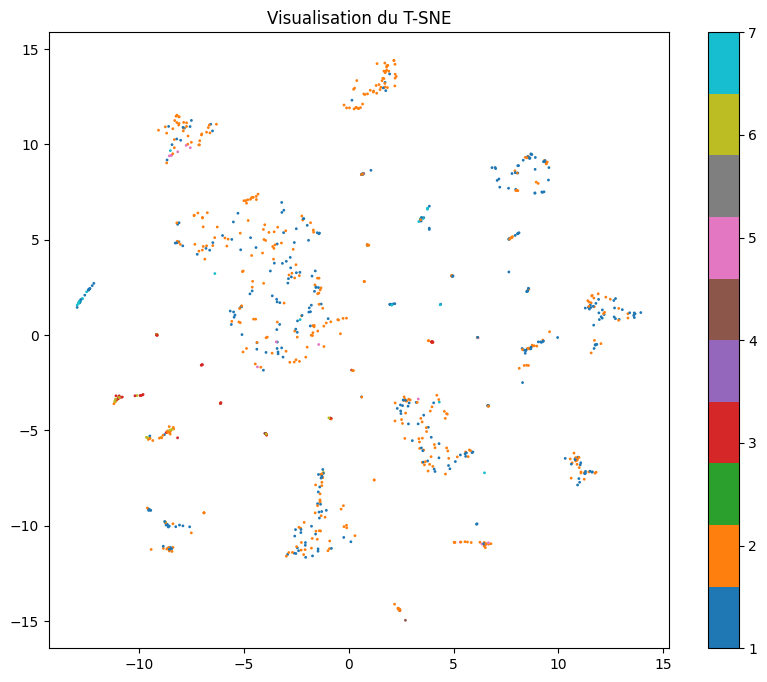


Visualisation UMAP...


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


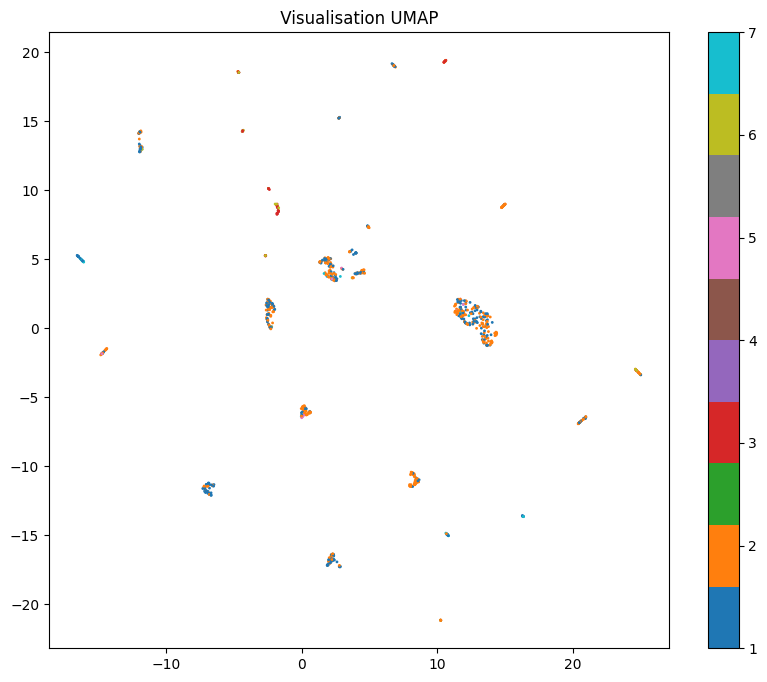


Classification des données originales
Accuracy: 0.9551
F1-Score: 0.9549

Rapport de classification:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203


Réalisation d'un sous-échantillonnage...


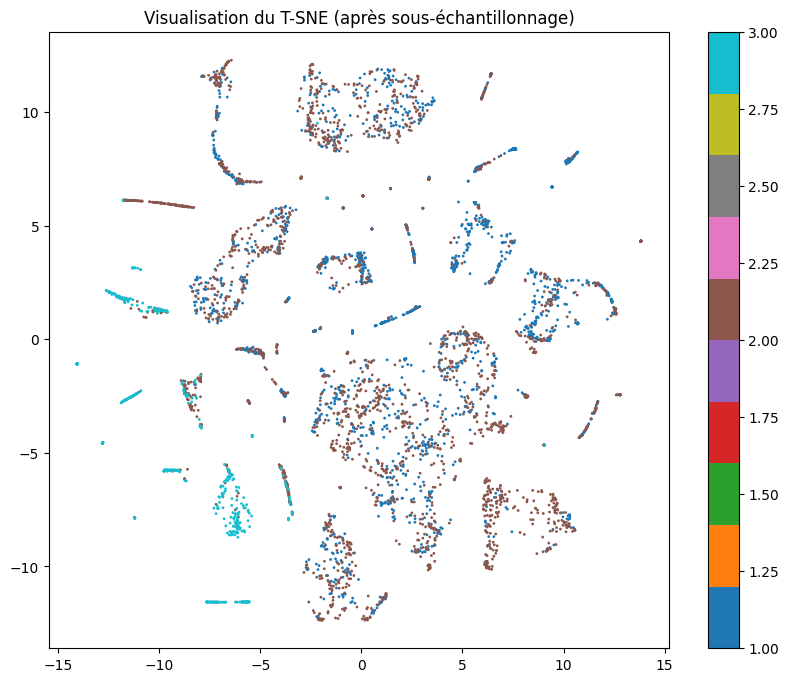

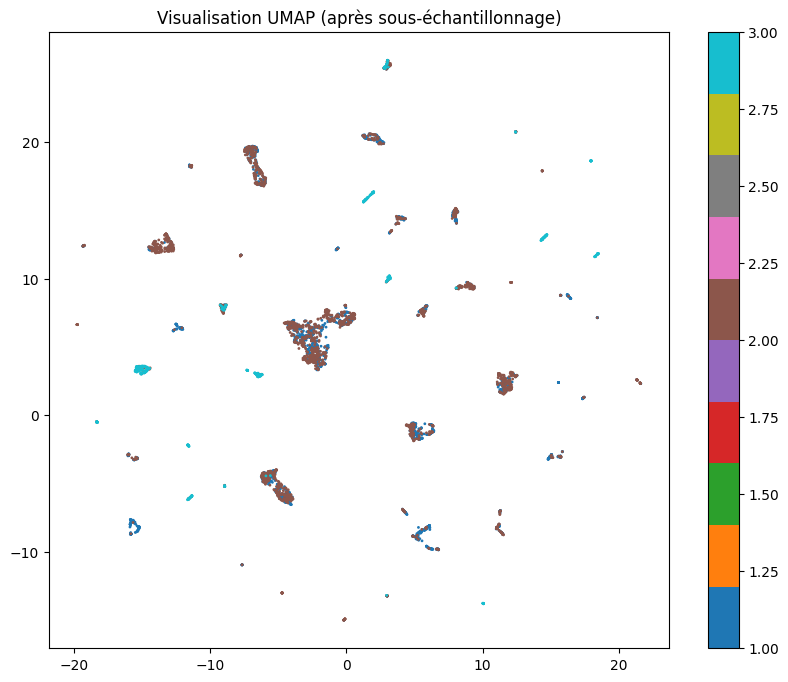


Classification des données sous-échantillonnées
Accuracy: 0.7599
F1-Score: 0.7686

Rapport de classification:
              precision    recall  f1-score   support

           1       0.77      0.78      0.78     42557
           2       0.87      0.70      0.78     56500
           3       0.79      0.82      0.81      7121
           4       0.52      0.97      0.68       526
           5       0.28      0.95      0.44      1995
           6       0.55      0.89      0.68      3489
           7       0.57      0.97      0.72      4015

    accuracy                           0.76    116203
   macro avg       0.62      0.87      0.70    116203
weighted avg       0.80      0.76      0.77    116203


Réalisation du suréchantillonnage SMOTE...


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


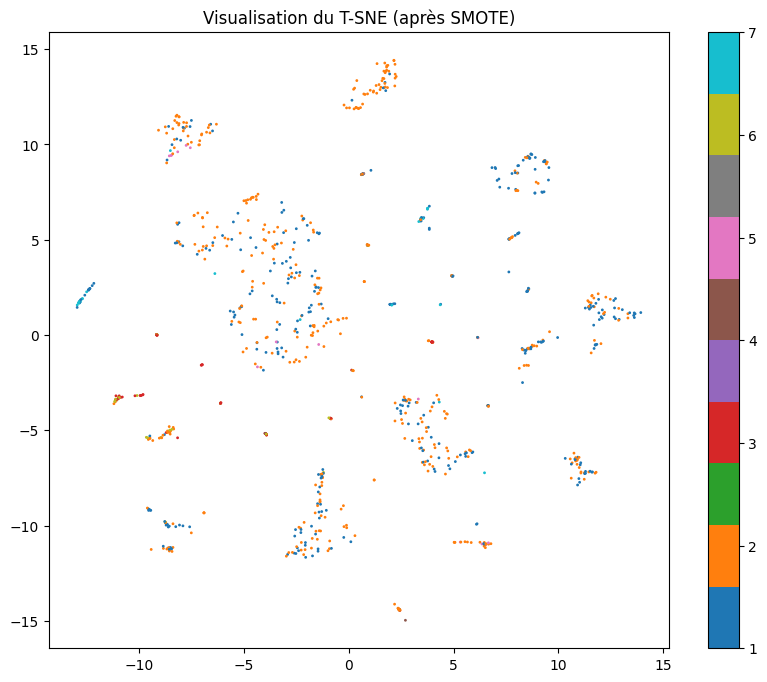

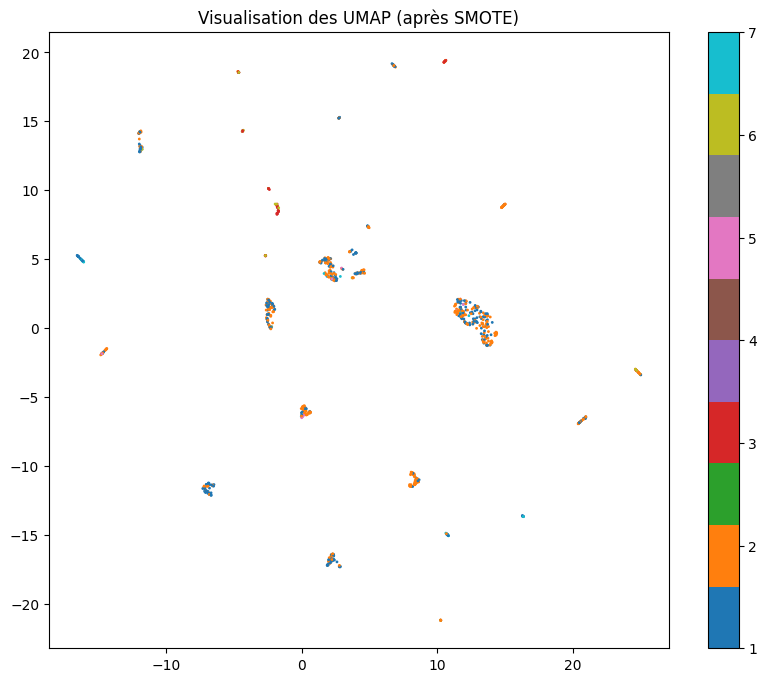


Classification des données suréchantillonnées SMOTE
Accuracy: 0.9571
F1-Score: 0.9571

Rapport de classification:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96     42557
           2       0.96      0.96      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.89      0.88      0.89       526
           5       0.86      0.91      0.88      1995
           6       0.90      0.93      0.91      3489
           7       0.95      0.98      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.92      0.94      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers

# Désactiver les messages d'information de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Charger et préparer les données
print("1. Chargement des données...")
columns = [
    *[f"Elevation_{i}" for i in range(1)],
    *[f"Aspect_{i}" for i in range(1)],
    *[f"Slope_{i}" for i in range(1)],
    *[f"Horizontal_Distance_To_Hydrology_{i}" for i in range(1)],
    *[f"Vertical_Distance_To_Hydrology_{i}" for i in range(1)],
    *[f"Horizontal_Distance_To_Roadways_{i}" for i in range(1)],
    *[f"Hillshade_9am_{i}" for i in range(1)],
    *[f"Hillshade_Noon_{i}" for i in range(1)],
    *[f"Hillshade_3pm_{i}" for i in range(1)],
    *[f"Horizontal_Distance_To_Fire_Points_{i}" for i in range(1)],
    *[f"Wilderness_Area_{i}" for i in range(4)],
    *[f"Soil_Type_{i}" for i in range(40)],
    "Cover_Type"
]

data = pd.read_csv("./covtype.data", header=None, names=columns)


X=data.drop('Cover_Type', axis=1)
y=data['Cover_Type']



# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction de visualisation
def visualize_embeddings(X, y, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=1)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Fonction pour entraîner et évaluer
def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    print(f"\n{title}")

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))

# 1. Visualisation avec T-SNE
print("\nVisualisation du T-SNE...")
tsne = TSNE(n_components=2, max_iter=300, random_state=42)  # Réduire max_iter pour optimiser
X_tsne = tsne.fit_transform(X_train_scaled[:1000])
visualize_embeddings(X_tsne, y_train[:1000], 'Visualisation du T-SNE')

# 2. Visualisation avec UMAP standard
print("\nVisualisation UMAP...")
standard_umap = umap.UMAP(random_state=42)
X_umap = standard_umap.fit_transform(X_train_scaled[:1000])
visualize_embeddings(X_umap, y_train[:1000], ' Visualisation UMAP ')

# 3. Classification initiale
train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test, "2.Classification des données originales")

# 4. Under-sampling
print("\nRéalisation d'un sous-échantillonnage...")
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)

# Visualisation après under-sampling
X_tsne_under = tsne.fit_transform(X_train_under[:5000])
visualize_embeddings(X_tsne_under, y_train_under[:5000], 'Visualisation du T-SNE (après sous-échantillonnage)')

X_umap_under = standard_umap.fit_transform(X_train_under[:5000])
visualize_embeddings(X_umap_under, y_train_under[:5000], 'Visualisation UMAP (après sous-échantillonnage)')

train_and_evaluate(X_train_under, X_test_scaled, y_train_under, y_test, "3.Classification des données sous-échantillonnées")

# 5. SMOTE
print("\nRéalisation du suréchantillonnage SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 6. Visualisation après SMOTE
X_tsne_smote = tsne.fit_transform(X_train_smote[:1000])
visualize_embeddings(X_tsne_smote, y_train_smote[:1000], 'Visualisation du T-SNE (après SMOTE)')

X_umap_smote = standard_umap.fit_transform(X_train_smote[:1000])
visualize_embeddings(X_umap_smote, y_train_smote[:1000], 'Visualisation des UMAP (après SMOTE)')

train_and_evaluate(X_train_smote, X_test_scaled, y_train_smote, y_test, "4.Classification des données suréchantillonnées SMOTE")
